LATAR BELAKANG

Sejak berdirinya pada tahun 2012, sebuah perusahaan supermarket telah mengumpulkan beragam data mengenai pelanggan dan interaksi pelanggan dengan perusahaan yang disimpan dalam sebuah database. Hal ini menjadi penting bagi Data Scientist pada perusahaan untuk dapat memahami profil pelanggan, perilaku mereka terhadap perusahaan, kecocokan produk perusahaan dengan preferensi pelanggan, efektivitas upaya promosi, lokasi pembelian pelanggan, serta umpan balik yang diterima. Analisa Data yang mendalam ini tentunya akan berguna bagi stakeholders perusahaan dalam memberikan wawasan yang diperlukan bagi perusahaan untuk mengambil keputusan yang tepat guna memenuhi kebutuhan pelanggan, meningkatkan strategi pemasaran, dan merencanakan ekspansi di masa depan.

Pernyataan Masalah

1. Perusahaan perlu mengidentifikasi dan menganalisa profil pelanggan, produk, promosi, dan lokasi pembelian guna meningkatkan penetrasi pasar dan pengambilan keputusan strategis.
2. Perusahaan perlu mengidentifikasi dan menganalisa segementasi dari pelanggan serta bagaimana trend utama dari produk dan penjualan perusahaan.
3. Perusahaan perlu menganalisa dan mengidentifikasi bagaimana korelasi antara produk yang dimiliki perusahaan terhadap profile customer dan sebagainya.
4. Perusahaan perlu menganalisa dan mengidentifikasi bagaimana upaya promosi yang dilakukan serta korelasinya pada produk yang dimiliki oleh perusahaan.
5. Perusahaan perlu menganalisa dan mengidentifikasi bagaimana korelasi antara lokasi pembelian terhadap produk maupun upaya promosi yang dilakukan oleh perusahaan serta customer profile.
6. Perusahaan perlu menganalisa dan mengidentifikasi bagaimana feedback yang dimiliki oleh customer dan korelasinya terhadap customer profile, produk, promosi serta lokasi pembelian yang dilakukan oleh customer

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

# Load dataset Supermarket Customer
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1zsc1oIwKFZKzgTYE8s0bXRVyqV61VXce/export?format=csv')

# Tampilkan informasi awal tentang dataset
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

# Tampilkan 5 baris teratas dan terbawah dari dataset
display(df.head(), df.tail())

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,...,1,0,0,0,0,0,0,3,11,0
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,0,3,11,1
2,9,1975,Master,Single,46098.0,1,1,18-08-2012,86,57,...,8,0,0,0,0,0,0,3,11,0
3,13,1947,PhD,Widow,25358.0,0,1,22-07-2013,57,19,...,6,0,0,0,0,0,0,3,11,0
4,17,1971,PhD,Married,60491.0,0,1,06-09-2013,81,637,...,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,11178,1972,Master,Single,42394.0,1,0,23-03-2014,69,15,...,7,0,0,0,0,0,0,3,11,0
2236,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,0,0,0,0,0,0,3,11,0
2237,11187,1978,Basic,Single,26487.0,1,0,20-05-2013,23,2,...,5,0,0,0,0,0,0,3,11,0
2238,11188,1957,Graduation,Together,26091.0,1,1,25-02-2014,84,15,...,5,0,0,0,0,0,0,3,11,0
2239,11191,1986,Graduation,Divorced,41411.0,0,0,07-12-2013,11,37,...,6,0,0,0,0,0,0,3,11,0


In [5]:
# DATA UNDERSTANDING DAN DATA CLEANING

# Pertama, mari kita lihat apakah ada nilai yang hilang pada kolom ID pelanggan
missing_id = df['ID'].isnull().sum()
print(f'Jumlah nilai yang hilang pada kolom ID pelanggan: {missing_id}')


Jumlah nilai yang hilang pada kolom ID pelanggan: 0


In [6]:
# IDENTIFIKASI jumlah missing value di setiap kolom
missing_values = df.isna().sum()

# Menghitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100

# Menampilkan jumlah dan persentase missing value
print("Jumlah missing value per kolom:")
print(missing_values)
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Jumlah missing value per kolom:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Persentase missing value per kolom:
ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidh

In [31]:
# Menangani missing value sesuai dengan kebutuhan

# Menampilkan informasi dataset setelah proses data cleaning
df['Income'].fillna(df['Income'].mean(), inplace=True)
print("\nInformasi dataset setelah data cleaning:")
print(df.info())


Informasi dataset setelah data cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2240 non-null   int64         
 1   Year_Birth              2240 non-null   int64         
 2   Education               2240 non-null   object        
 3   Marital_Status          2240 non-null   object        
 4   Income                  2240 non-null   float64       
 5   Kidhome                 2240 non-null   int64         
 6   Teenhome                2240 non-null   int64         
 7   Dt_Customer             2240 non-null   datetime64[ns]
 8   Recency                 2240 non-null   int64         
 9   MntWines                2240 non-null   int64         
 10  MntFruits               2240 non-null   int64         
 11  MntMeatProducts         2240 non-null   int64         
 12  MntFis

1.Jumlah Missing Value per Kolom: Anda telah mengidentifikasi jumlah missing
value dalam setiap kolom. Tampaknya hanya kolom Income yang memiliki missing value sebanyak 24 entri.

2.Persentase Missing Value per Kolom: Anda juga telah menghitung persentase missing value dari total data dalam setiap kolom. Kolom Income memiliki persentase missing value sebesar 1.07%, yang diisi menggunakan rata-rata kolom income.


In [32]:
# Data yang sudah bersih
# Kita sudah selesai membersihkan data kita, lihat sekilas informasi dari data yang sudah dibersihkan

listItem = []
for col in df.columns:
    unique_samples = df[col].drop_duplicates().sample(min(2, df[col].nunique()), replace=True).values
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                     df[col].nunique(), list(unique_samples)])

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                      data=listItem)
print(df.shape)
dfDesc


(2240, 30)


,dataFeatures,dataType,null,unique,uniqueSample
0,ID,int64,0,2240,"[10870, 6653]"
1,Year_Birth,int64,0,59,"[1958, 1989]"
2,Education,object,0,5,"[PhD, 2n Cycle]"
3,Marital_Status,object,0,8,"[Absurd, Divorced]"
4,Income,float64,0,1975,"[50729.0, 37716.0]"
5,Kidhome,int64,0,3,"[1, 2]"
6,Teenhome,int64,0,3,"[2, 2]"
7,Dt_Customer,datetime64[ns],0,663,"[2012-09-25T00:00:00.000000000, 2013-09-28T00:..."
8,Recency,int64,0,100,"[0, 34]"
9,MntWines,int64,0,776,"[1020, 230]"


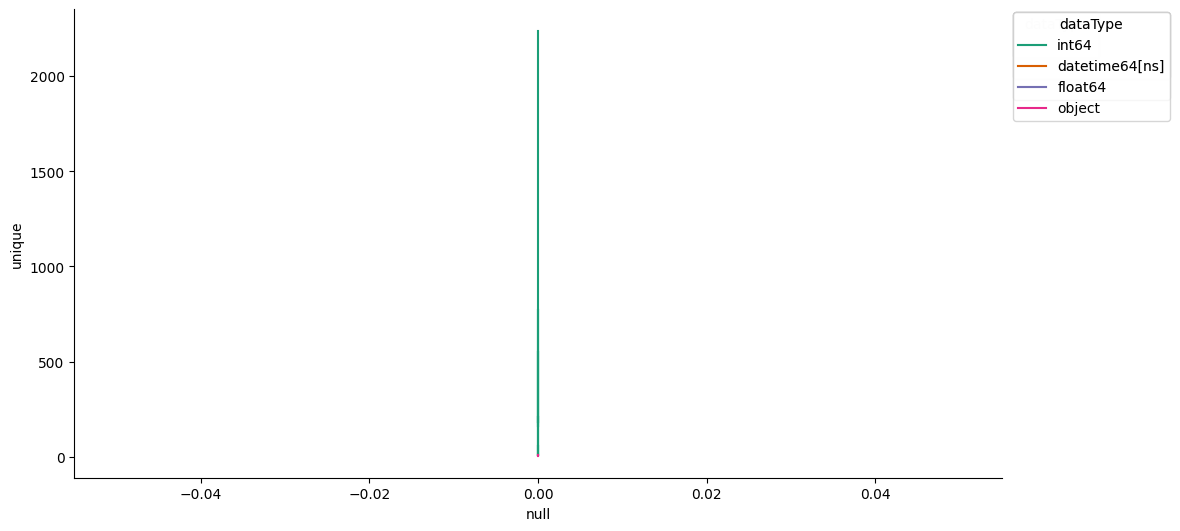

In [34]:
# @title null vs unique

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['null']
  ys = series['unique']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dfDesc.sort_values('null', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('dataType')):
  _plot_series(series, series_name, i)
  fig.legend(title='dataType', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('null')
_ = plt.ylabel('unique')


1. **ID**: Kolom ini berisi ID unik untuk setiap pelanggan. Tipe data kolom ini adalah integer, tidak ada nilai null, dan terdapat 2240 nilai unik.
   
2. **Year_Birth**: Kolom ini berisi tahun kelahiran pelanggan. Tipe data kolom ini adalah integer, tidak ada nilai null, dan terdapat 59 nilai unik yang mewakili rentang tahun kelahiran pelanggan.

3. **Education**: Kolom ini berisi tingkat pendidikan pelanggan. Tipe data kolom ini adalah objek, tidak ada nilai null, dan terdapat 5 nilai unik yang mencakup berbagai tingkat pendidikan.

4. **Marital_Status**: Kolom ini berisi status perkawinan pelanggan. Tipe data kolom ini adalah objek, tidak ada nilai null, dan terdapat 8 nilai unik yang mencakup berbagai status perkawinan.

5. **Income**: Kolom ini berisi pendapatan tahunan pelanggan. Tipe data kolom ini adalah float, terdapat 1974 nilai unik yang mencakup berbagai tingkat pendapatan.

6. **Kidhome** dan **Teenhome**: Kolom-kolom ini berisi jumlah anak di rumah yang masih anak-anak atau remaja. Tipe data kolom ini adalah integer, tidak ada nilai null, dan terdapat 3 nilai unik untuk masing-masing kolom.

7. **Dt_Customer**: Kolom ini berisi tanggal pendaftaran pelanggan. Tipe data kolom ini adalah objek, tidak ada nilai null, dan terdapat 663 nilai unik yang mewakili berbagai tanggal pendaftaran.

8. **Recency**: Kolom ini berisi jumlah hari sejak pembelian terakhir oleh pelanggan. Tipe data kolom ini adalah integer, tidak ada nilai null, dan terdapat 100 nilai unik yang mencakup berbagai rentang hari.


Statistik Deskriptif untuk Variabel Numerik:
                  ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   


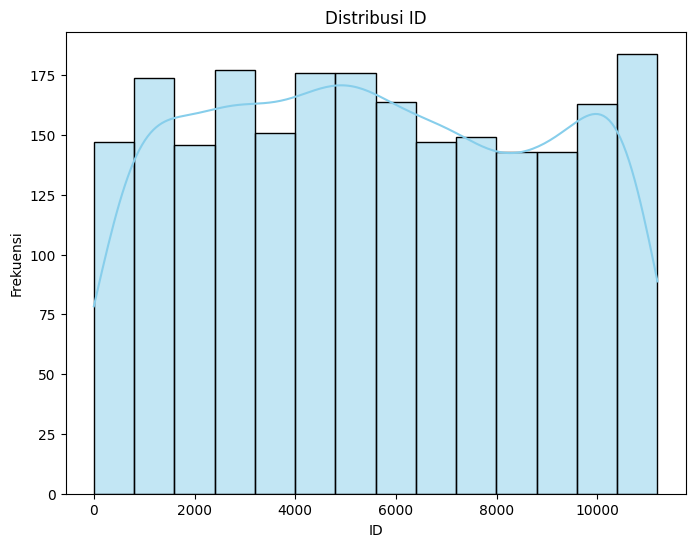

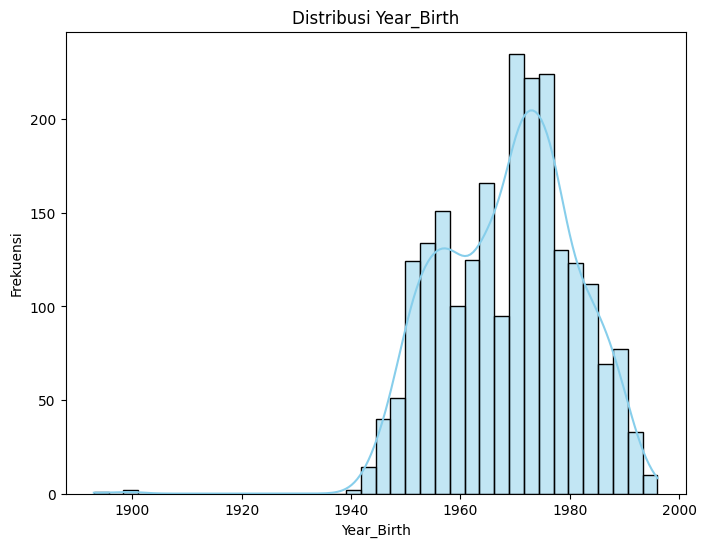

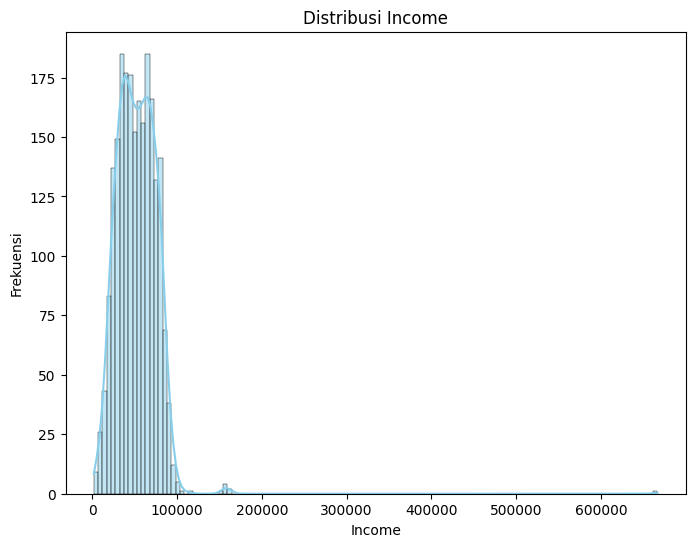

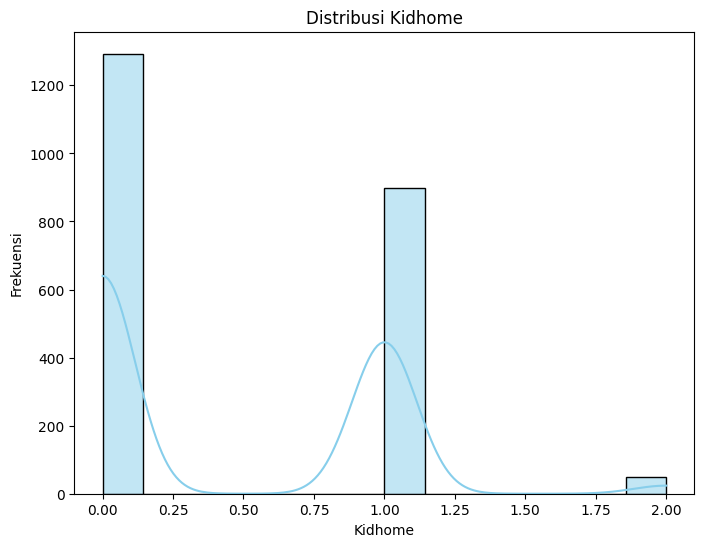

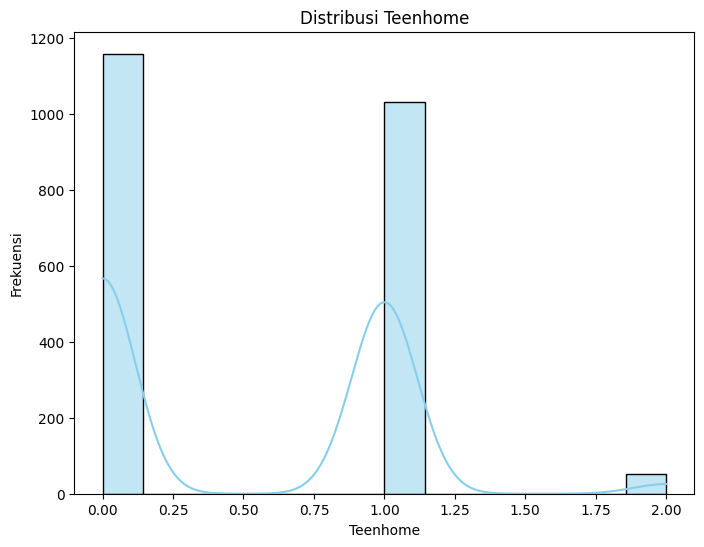

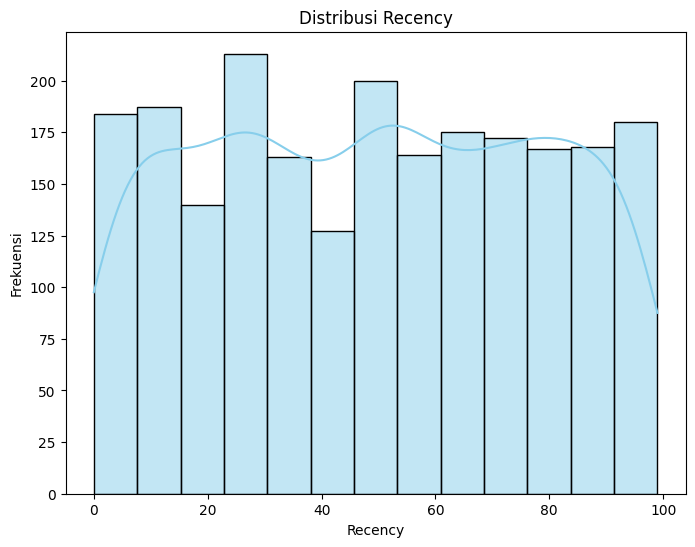

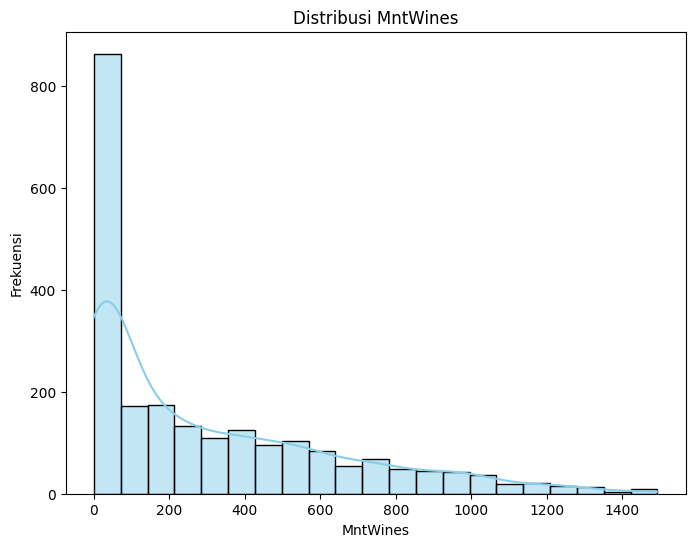

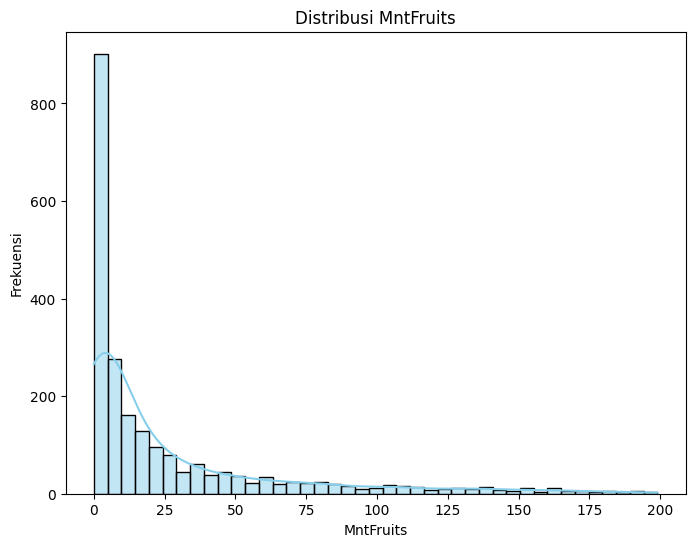

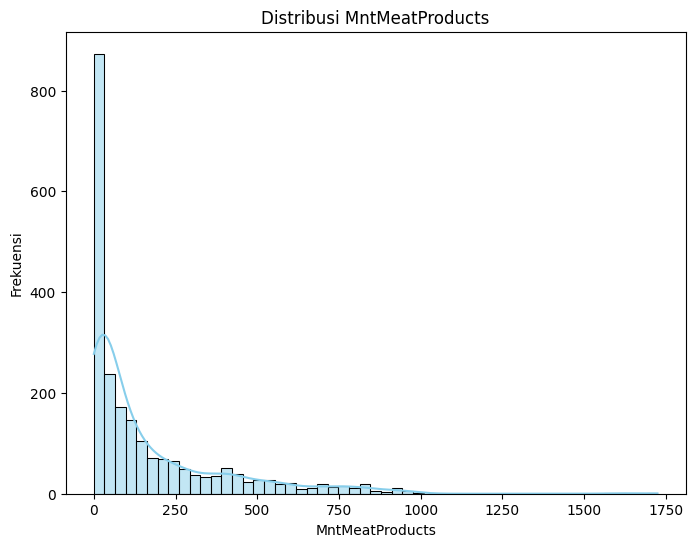

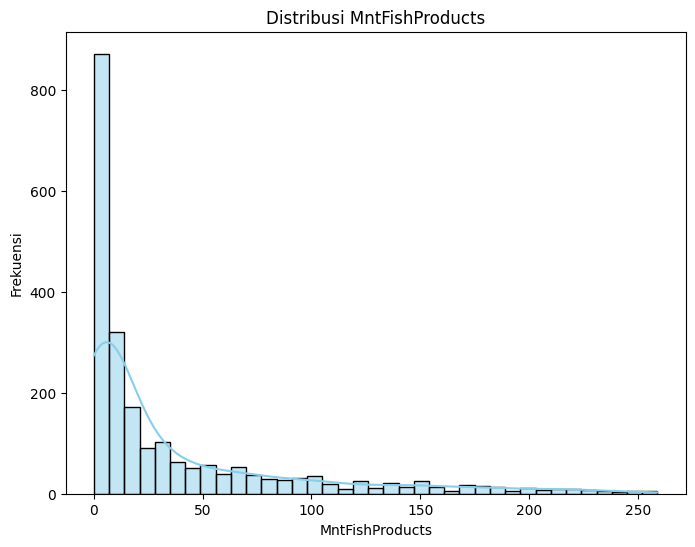

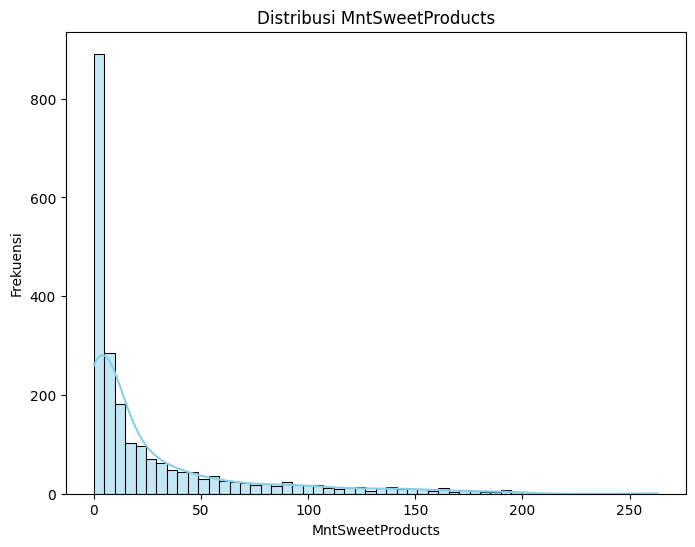

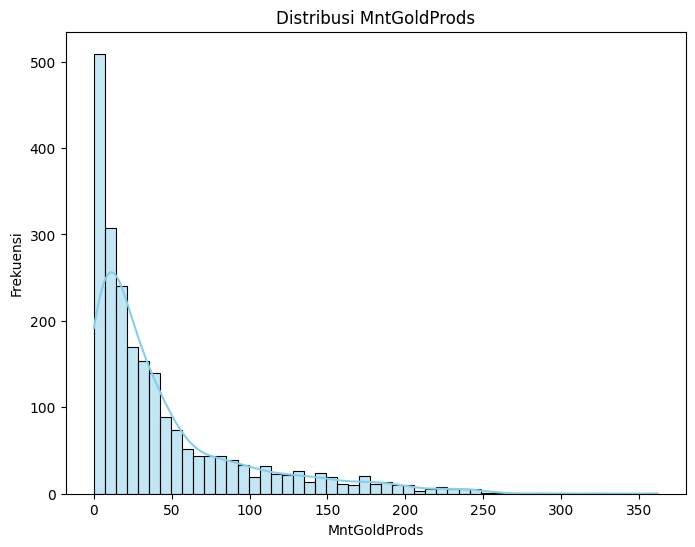

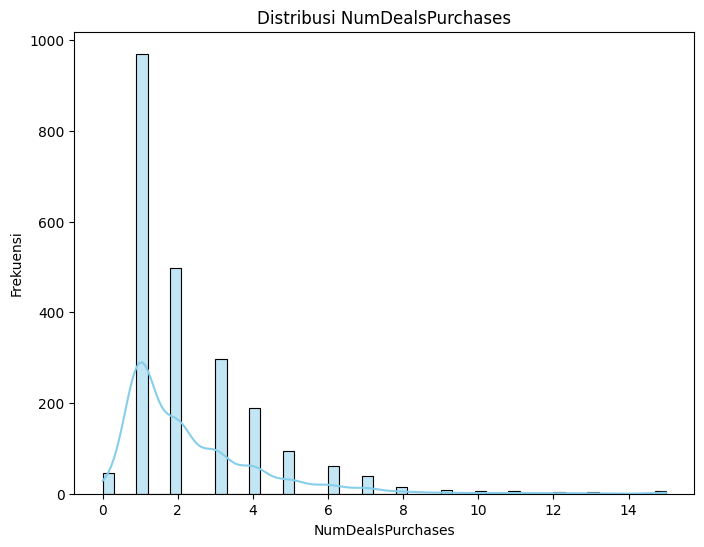

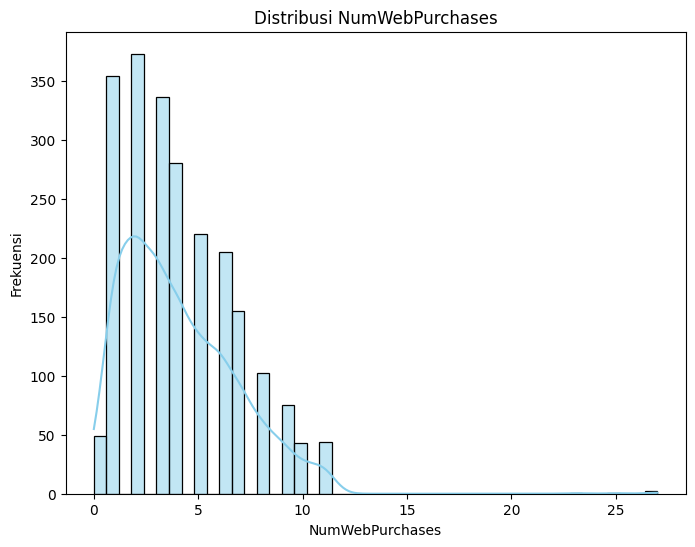

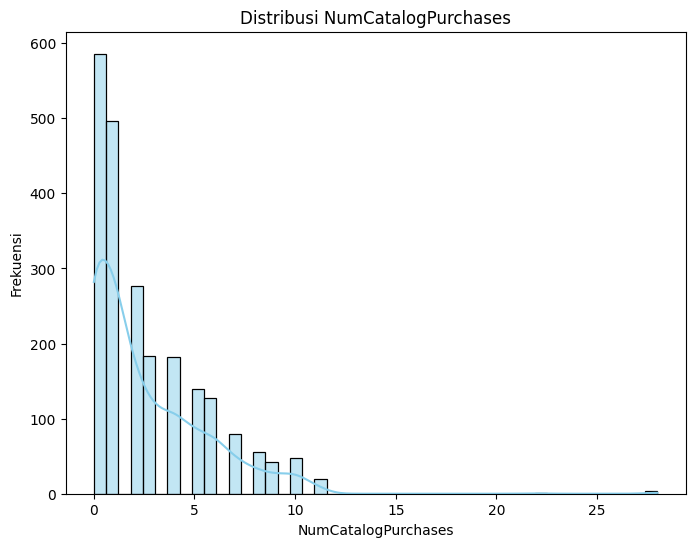

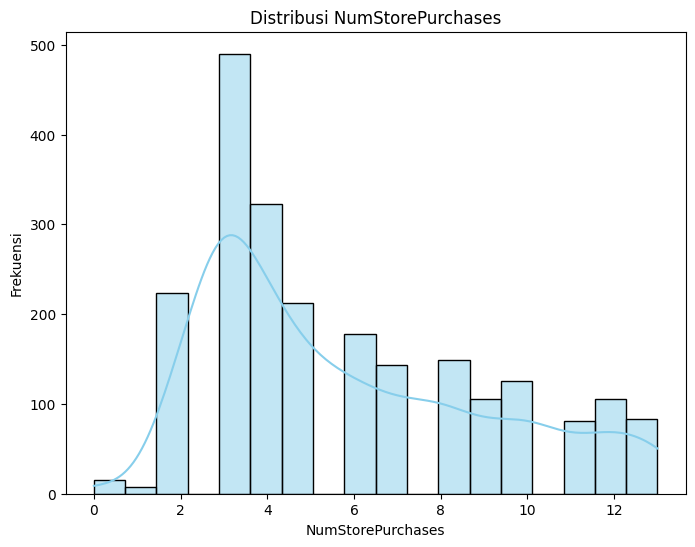

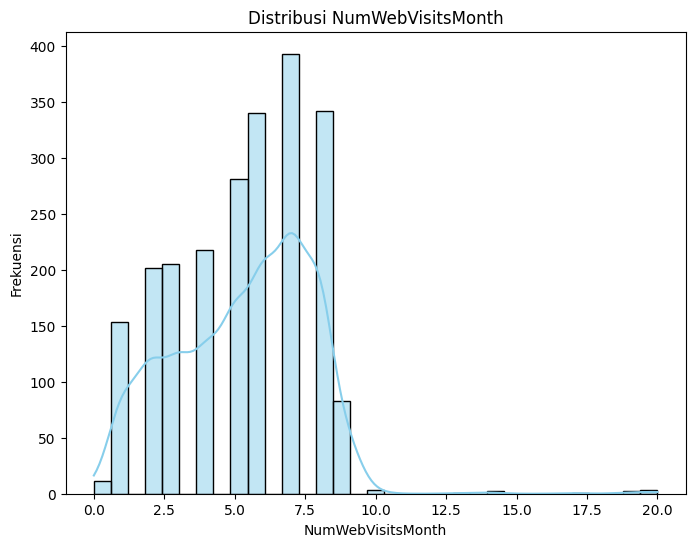

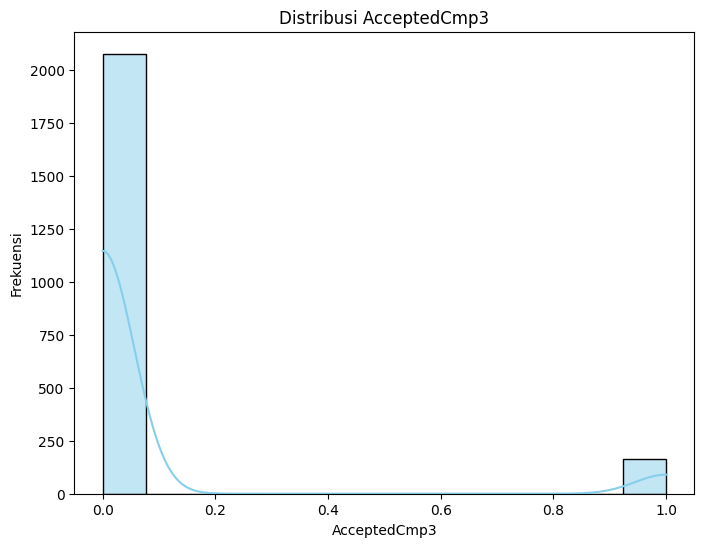

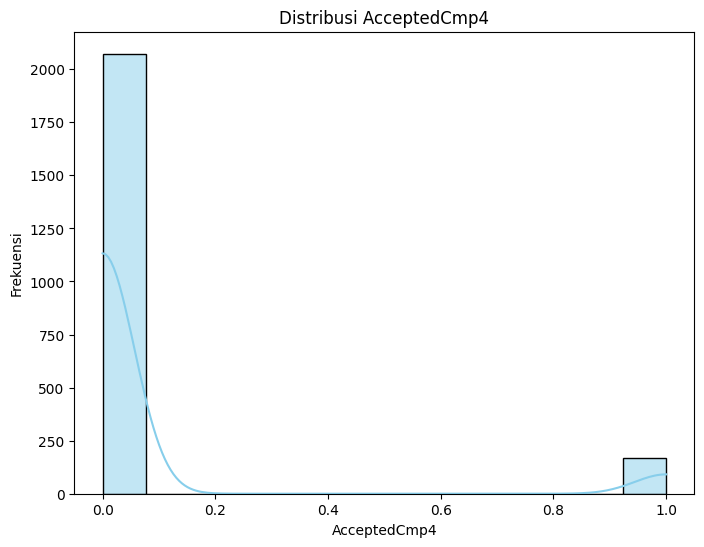

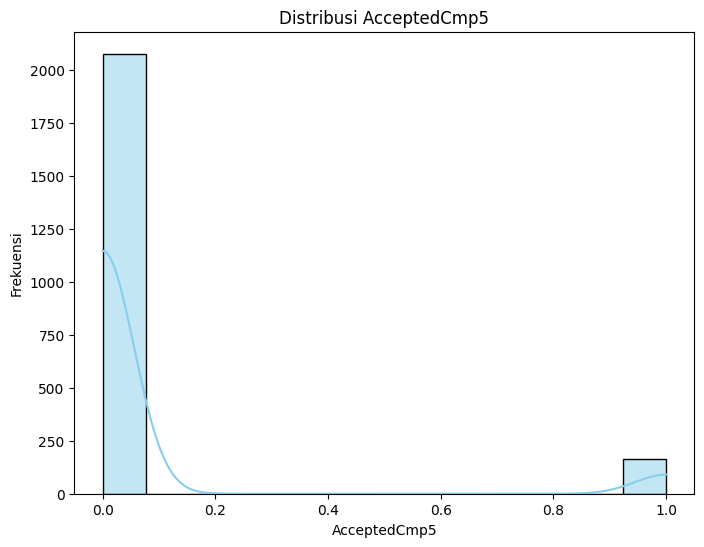

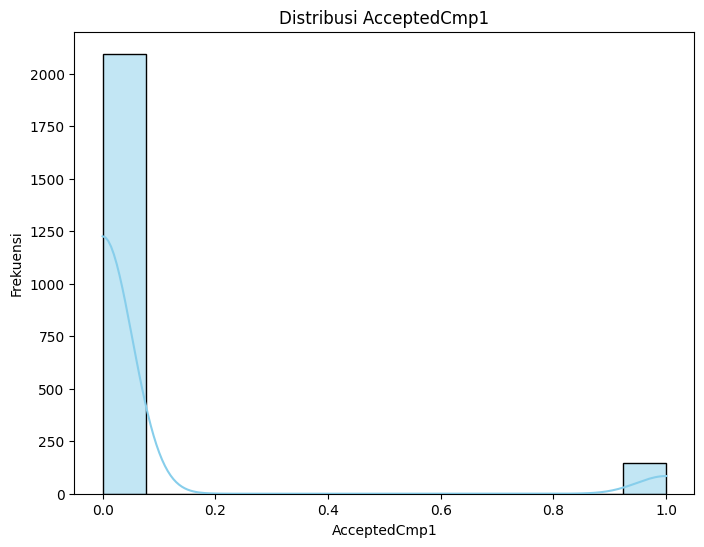

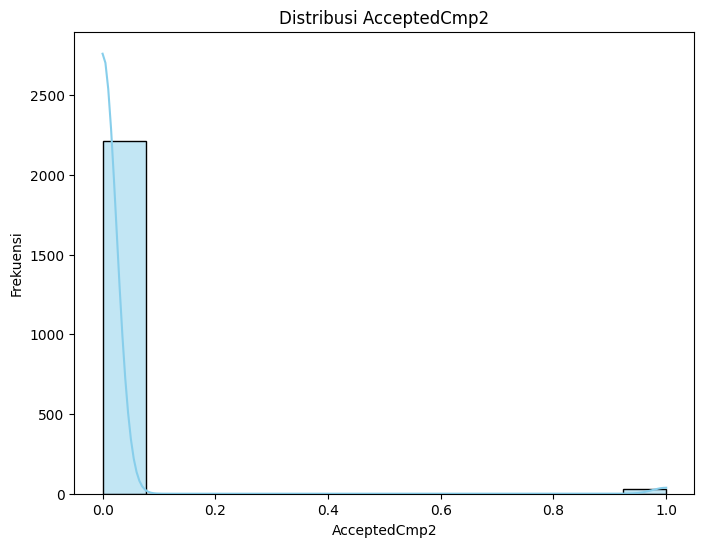

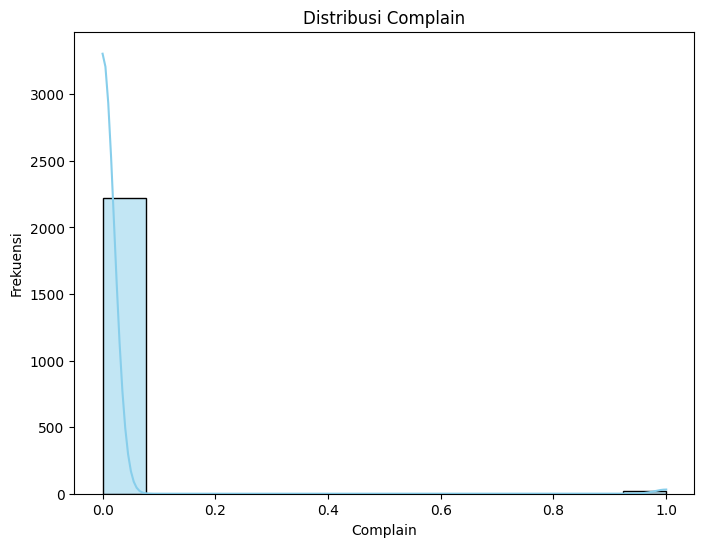

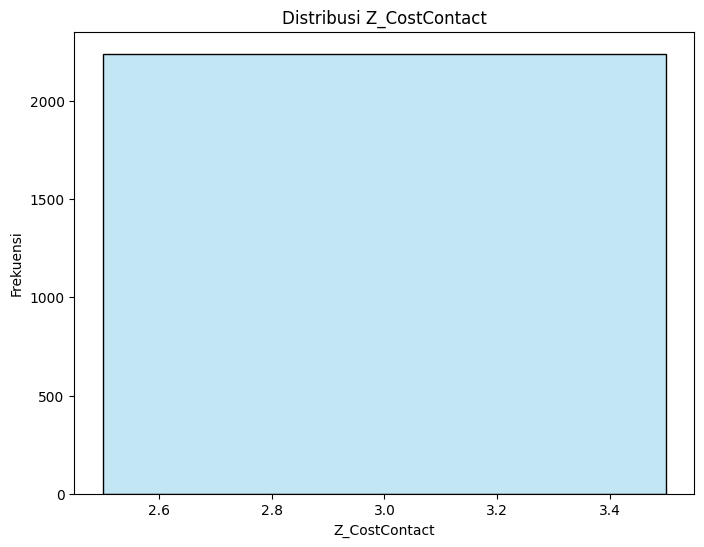

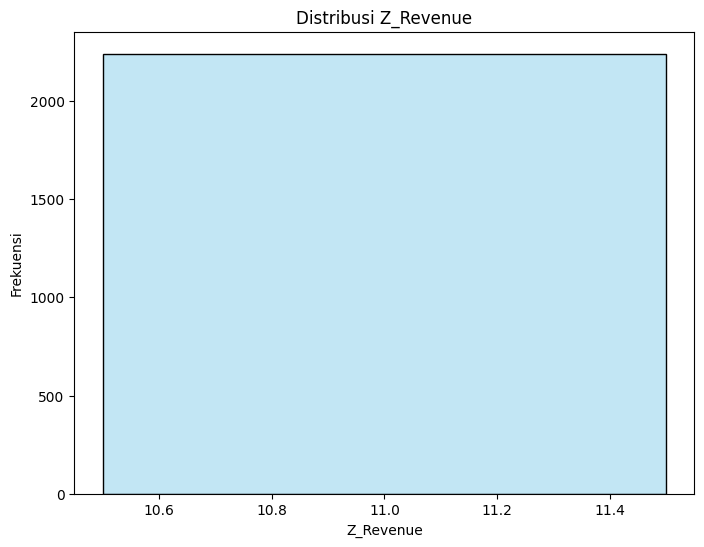

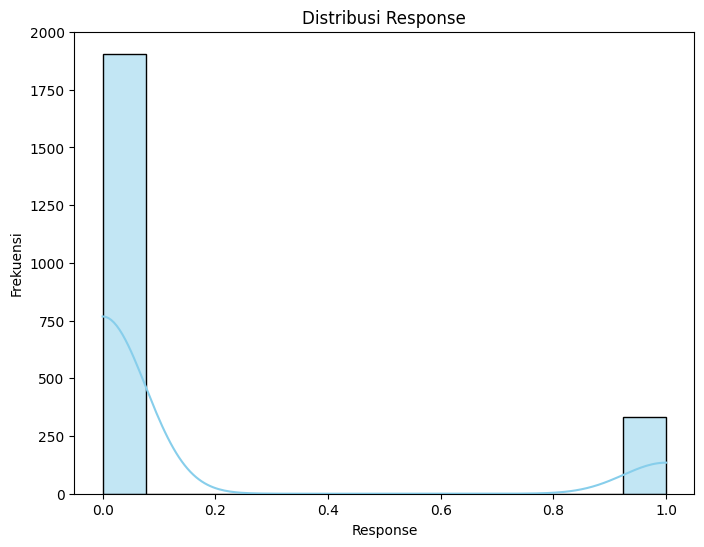

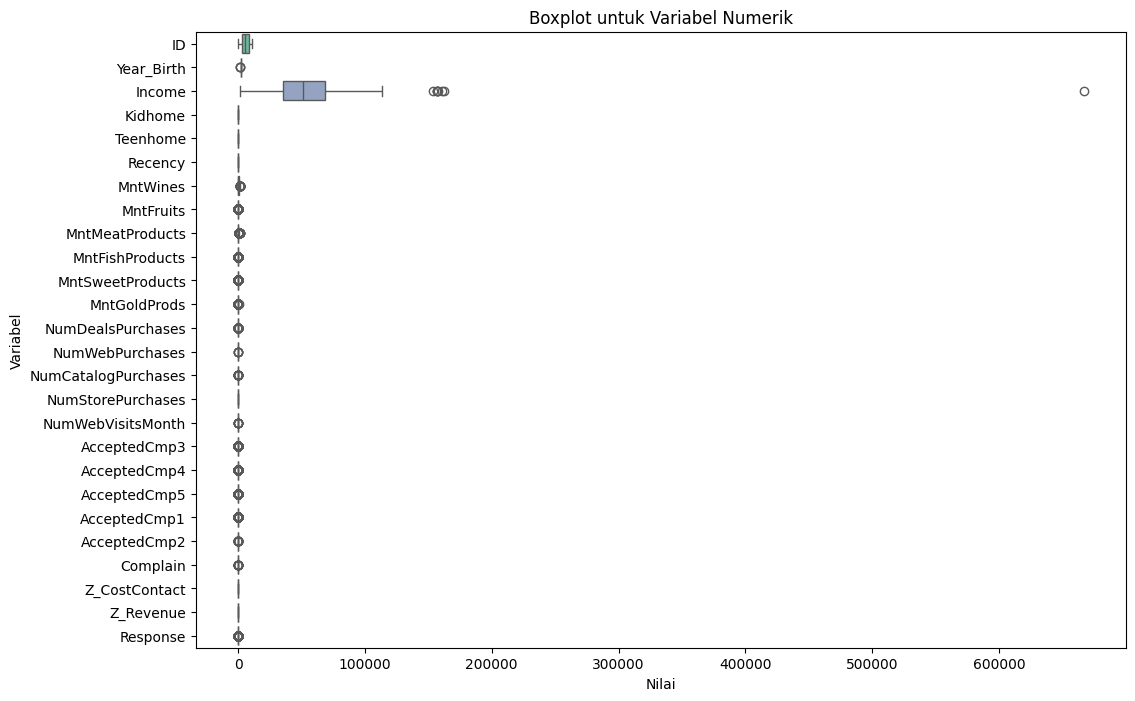

ValueError: could not convert string to float: 'Graduation'

In [35]:
# ANALISA DATA
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1zsc1oIwKFZKzgTYE8s0bXRVyqV61VXce/export?format=csv')

# ANALISIS STATISTIK DESKRIPTIF
descriptive_stats = df.describe()
print("Statistik Deskriptif untuk Variabel Numerik:\n", descriptive_stats)

# Visualisasi Distribusi untuk Variabel Numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

# Analisis Outlier
# Melihat boxplot untuk setiap variabel numerik
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_columns], orient='h', palette='Set2')
plt.title('Boxplot untuk Variabel Numerik')
plt.xlabel('Nilai')
plt.ylabel('Variabel')
plt.show()

# Korelasi Antar Variabel
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Variabel')
plt.show()

# Analisis Variabel Kategorikal
categorical_columns = df.select_dtypes(include=[np.object]).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column, palette='Set1')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.xticks(rotation=45)
    plt.show()

# Analisis Tren Waktu (jika berlaku)
# Gunakan visualisasi yang sesuai jika ada variabel waktu di dataset


Berdasarkan Exploratory Data Analysis (EDA) yang dilakukan dan hasil statistik deskriptif yang diperoleh, kita dapat menyimpulkan beberapa hal tentang dataset:

1. **Pendapatan Pelanggan**: Rata-rata pendapatan pelanggan adalah sekitar 52,247 dengan deviasi standar yang cukup besar (25,173), menunjukkan adanya variasi yang signifikan dalam pendapatan pelanggan.
2. **Umur Pelanggan**: Sebagian besar pelanggan lahir antara tahun 1959 dan 1977, dengan rata-rata tahun kelahiran sekitar 1968.
3. **Jumlah Anak dan Remaja di Rumah**: Sebagian besar pelanggan tidak memiliki anak di bawah usia 12 tahun di rumah, dan sebagian besar juga memiliki 0 atau 1 remaja di rumah.
4. **Pembelian Produk**: Rata-rata total belanjaan pelanggan cukup bervariasi di antara kategori produk, dengan beberapa kategori produk memiliki rata-rata yang lebih tinggi dari yang lain.
5. **Jumlah Pembelian Melalui Berbagai Saluran**: Jumlah pembelian melalui saluran-saluran seperti web, katalog, dan toko juga bervariasi, dengan beberapa saluran memiliki rata-rata yang lebih tinggi dari yang lain.
6. **Aktivitas Kunjungan ke Situs Web**: Rata-rata kunjungan pelanggan ke situs web per bulan adalah sekitar 5 kunjungan.
7. **Respons terhadap Penawaran dan Kampanye**: Proporsi pelanggan yang menerima penawaran kampanye tertentu atau meresponsnya cukup rendah, seperti yang ditunjukkan oleh nilai rata-rata variabel biner terkait.

dataset ini memiliki variasi yang signifikan dalam pendapatan dan perilaku pembelian pelanggan. Namun, respon terhadap penawaran atau kampanye tampaknya rendah, yang mungkin memerlukan peninjauan lebih lanjut untuk meningkatkan efektivitas strategi pemasaran.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Variabel yang akan digunakan untuk segmentasi
features = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
            'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
            'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

# Hapus baris yang mengandung nilai NaN
df_cleaned = df.dropna(subset=features)

# Preprocessing data dengan standardisasi
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned[features])

# jumlah klaster yang diinginkan
n_clusters = 4

# Membuat model KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Melakukan fitting model ke data
kmeans.fit(df_scaled)

# Menambahkan label klaster ke dalam dataset
df_cleaned['Cluster'] = kmeans.labels_

# Melihat distribusi pelanggan di setiap klaster
print(df_cleaned['Cluster'].value_counts())

# Melihat statistik deskriptif untuk setiap klaster
cluster_stats = df_cleaned.groupby('Cluster')[features].mean()
print(cluster_stats)


Cluster
1    991
3    480
0    415
2    330
Name: count, dtype: int64
               Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster                                                                    
0        78434.067470  49.144578  567.901205  81.308434       502.057831   
1        34843.949546  49.171544   38.858729   4.725530        20.754793   
2        49525.763636  47.693939  331.012121  12.442424        95.400000   
3        67408.156250  49.477083  609.710417  33.068750       228.456250   

         MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
Cluster                                                                       
0             118.332530         81.568675     87.426506           1.380723   
1               6.975782          4.941473     14.488396           1.861756   
2              19.827273         13.851515     57.839394           5.230303   
3              43.418750         34.535417     57.708333           2.093750   

Dari hasil segmentasi pelanggan menggunakan KMeans dengan 4 klaster, kita dapat melihat distribusi jumlah pelanggan di setiap klaster sebagai berikut:

- Klaster 0: Terdiri dari 415 pelanggan
- Klaster 1: Terdiri dari 991 pelanggan
- Klaster 2: Terdiri dari 330 pelanggan
- Klaster 3: Terdiri dari 480 pelanggan

Selanjutnya, kita dapat melihat statistik deskriptif untuk setiap klaster:

- **Klaster 0**: Pelanggan pada klaster ini memiliki pendapatan rata-rata yang tinggi (sekitar $78,434) dan cenderung melakukan pembelian produk dalam jumlah besar, seperti wine, daging, dan produk emas. Mereka juga melakukan pembelian secara katalog, di toko, dan secara online dengan frekuensi yang tinggi.

- **Klaster 1**: Pelanggan pada klaster ini memiliki pendapatan rata-rata yang relatif rendah (sekitar $34,844) dan cenderung melakukan pembelian produk dalam jumlah kecil. Mereka juga jarang melakukan pembelian secara katalog dan online.

- **Klaster 2**: Pelanggan pada klaster ini memiliki pendapatan rata-rata yang sedang (sekitar $49,526) dan cenderung melakukan pembelian produk dalam jumlah sedang. Mereka lebih sering melakukan pembelian secara online dan di toko daripada secara katalog.

- **Klaster 3**: Pelanggan pada klaster ini memiliki pendapatan rata-rata yang tinggi (sekitar $67,408) dan cenderung melakukan pembelian produk dalam jumlah besar, terutama wine dan daging. Mereka juga sering melakukan pembelian secara katalog dan online.

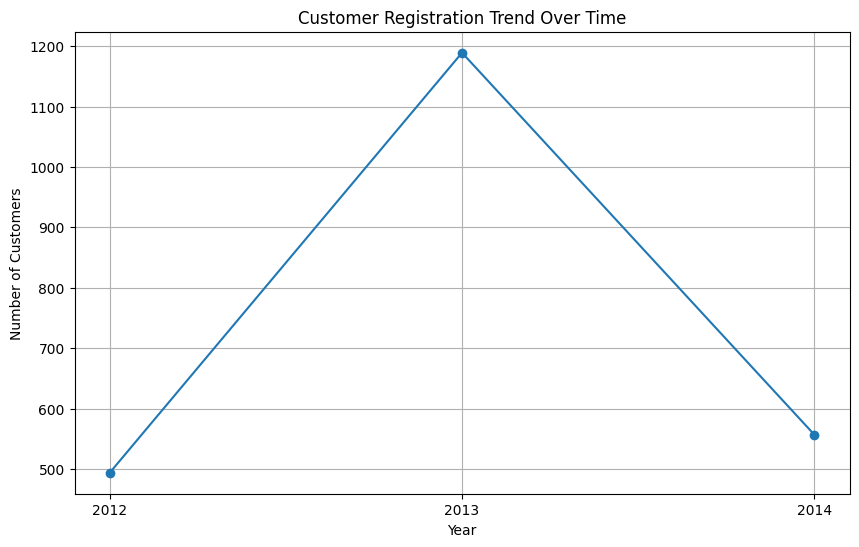

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ubah kolom 'Dt_Customer' menjadi tipe datetime dengan format dmy
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Buat kolom baru 'Year_Customer' untuk mengekstrak tahun pendaftaran pelanggan
df['Year_Customer'] = df['Dt_Customer'].dt.year

# Hitung jumlah pelanggan yang mendaftar setiap tahun
customer_registration_trend = df['Year_Customer'].value_counts().sort_index()

# Plot tren waktu
plt.figure(figsize=(10, 6))
plt.plot(customer_registration_trend.index, customer_registration_trend.values, marker='o')
plt.title('Customer Registration Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Customers')
plt.xticks(customer_registration_trend.index)
plt.grid(True)
plt.show()


Hasil analisis tren pendaftaran pelanggan menunjukkan perubahan jumlah pelanggan dari tahun ke tahun. Berikut adalah interpretasi hasil tersebut:

Tren Pendaftaran Pelanggan:

Pada tahun 2012, jumlah pelanggan yang mendaftar sekitar 500.
Pada tahun 2013, terjadi lonjakan signifikan dalam jumlah pendaftaran pelanggan, dengan jumlah pelanggan yang mendaftar mencapai sekitar 1200.
Pada tahun 2014, terjadi penurunan jumlah pendaftaran pelanggan dibandingkan tahun sebelumnya. Meskipun tidak sebesar lonjakan pada tahun 2013, jumlah pelanggan yang mendaftar masih relatif stabil, berkisar antara 500 hingga 600 pelanggan.
Analisis Tren:

Lonjakan pendaftaran pelanggan pada tahun 2013 mungkin disebabkan oleh berbagai faktor, seperti strategi pemasaran yang efektif, peningkatan kesadaran merek, atau penawaran promosi yang menarik.
Penurunan jumlah pendaftaran pelanggan pada tahun 2014 bisa menjadi area perhatian bagi perusahaan. Ini mungkin menandakan perlunya meninjau kembali strategi pemasaran atau menawarkan insentif tambahan untuk menarik lebih banyak pelanggan baru.

In [12]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1zsc1oIwKFZKzgTYE8s0bXRVyqV61VXce/export?format=csv')

# Mengonversi kolom 'Dt_Customer' menjadi tipe data datetime dengan format dmy
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Filter data untuk tahun pembelian 2013
df_2013 = df[df['Dt_Customer'].dt.year == 2013]

# Pilih kolom yang ingin dianalisis
selected_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
                    'AcceptedCmp5', 'Response']

# Hitung korelasi antara kolom-kolom yang dipilih
correlation_matrix = df_2013[selected_columns].corr()

# Tampilkan matriks korelasi
print("Matriks Korelasi antara Tahun Pembelian 2013 dengan Produk, Kampanye, dan Lokasi Pembelian:")
print(correlation_matrix)


Matriks Korelasi antara Tahun Pembelian 2013 dengan Produk, Kampanye, dan Lokasi Pembelian:
                     MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
MntWines             1.000000   0.378865         0.570155         0.408694   
MntFruits            0.378865   1.000000         0.541993         0.580312   
MntMeatProducts      0.570155   0.541993         1.000000         0.541410   
MntFishProducts      0.408694   0.580312         0.541410         1.000000   
MntSweetProducts     0.352651   0.546492         0.499048         0.581827   
MntGoldProds         0.386742   0.385536         0.331252         0.425683   
NumDealsPurchases   -0.004768  -0.124402        -0.149613        -0.126342   
NumWebPurchases      0.536403   0.318184         0.313591         0.298771   
NumCatalogPurchases  0.629013   0.460042         0.725658         0.536311   
NumStorePurchases    0.611039   0.486326         0.482402         0.488665   
AcceptedCmp1         0.404045   0.253657         0

Matriks korelasi yang Anda sajikan menggambarkan hubungan korelasi antara variabel-variabel yang diberikan dalam dataset Anda, dengan fokus pada tahun pembelian 2013. Berikut adalah beberapa interpretasi dari korelasi antar variabel:

1. **Pembelian Produk:**
   - Terdapat korelasi positif antara pembelian wine (MntWines), pembelian buah (MntFruits), pembelian produk daging (MntMeatProducts), dan pembelian produk ikan (MntFishProducts). Ini menunjukkan bahwa kecenderungan pelanggan untuk membeli satu jenis produk juga cenderung untuk membeli jenis produk lainnya.

2. **Pembelian Melalui Saluran Penjualan:**
   - Terdapat korelasi positif antara jumlah pembelian melalui katalog (NumCatalogPurchases), pembelian langsung di toko (NumStorePurchases), dan pembelian melalui situs web (NumWebPurchases). Hal ini mengindikasikan bahwa pelanggan yang aktif dalam satu saluran penjualan juga cenderung aktif dalam saluran penjualan lainnya.

3. **Respon terhadap Kampanye Pemasaran:**
   - Terdapat korelasi positif antara respon pelanggan (Response) dengan penerimaan kampanye pemasaran, khususnya kampanye 1 (AcceptedCmp1) dan kampanye 5 (AcceptedCmp5). Ini menunjukkan bahwa pelanggan yang merespons satu kampanye pemasaran juga cenderung merespons kampanye pemasaran lainnya.

4. **Pembelian dengan Penawaran Khusus:**
   - Tidak terdapat korelasi yang signifikan antara jumlah pembelian dengan penawaran khusus (NumDealsPurchases) dengan variabel lainnya. Ini menunjukkan bahwa pola pembelian dengan penawaran khusus tidak terlalu berkorelasi dengan pola pembelian produk lainnya.

5. **Penerimaan Kampanye Spesifik:**
   - Terdapat korelasi positif antara penerimaan beberapa kampanye spesifik (AcceptedCmp1, AcceptedCmp4, dan AcceptedCmp5) dengan pembelian produk tertentu, seperti wine, daging, dan ikan. Ini menunjukkan bahwa kampanye-kampanye ini mungkin berhasil menargetkan segmen pelanggan tertentu yang cenderung membeli produk-produk tersebut.


In [ ]:
import pandas as pd

# Load dataset dari URL
url = 'https://docs.google.com/spreadsheets/d/1zsc1oIwKFZKzgTYE8s0bXRVyqV61VXce/export?format=csv'
df = pd.read_csv(url)

# Hapus kolom-kolom yang tidak relevan untuk perhitungan total pembelian
df_cleaned = df.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
                      'Teenhome', 'Dt_Customer', 'Recency', 'NumDealsPurchases', 'NumWebVisitsMonth',
                      'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)

# Hitung total pembelian untuk setiap produk
total_pembelian = df_cleaned.sum()

# Cetak total pembelian untuk setiap produk
print(total_pembelian)


MntWines               680816
MntFruits               58917
MntMeatProducts        373968
MntFishProducts         84057
MntSweetProducts        60621
MntGoldProds            98609
NumWebPurchases          9150
NumCatalogPurchases      5963
NumStorePurchases       12970
AcceptedCmp3              163
AcceptedCmp4              167
AcceptedCmp5              163
AcceptedCmp1              144
AcceptedCmp2               30
Complain                   21
dtype: int64


Pembelian Produk Terbanyak = MntWines
Lokasi Pembelian Terbanyak = Store Purchases
Accepted Campaign terbanyak = Cmp4

Pembelian Produk Terendah = MntFruits
Lokasi Pembelian Terendah = Catalog
Accepted Campaign Terendah = Cmp2


In [19]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Ubah kolom 'Marital_Status' menjadi nilai numerik
df['Marital_Status_Encoded'] = label_encoder.fit_transform(df['Marital_Status'])

# Hitung korelasi antara variabel-variabel yang diminati
correlation = df[['MntWines', 'Income', 'Kidhome', 'Teenhome', 'Marital_Status_Encoded', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                  'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Complain']].corr()

# Tampilkan hasil korelasi
print(correlation)


                        MntWines    Income   Kidhome  Teenhome  \
MntWines                1.000000  0.578650 -0.496297  0.004846   
Income                  0.578650  1.000000 -0.428669  0.019133   
Kidhome                -0.496297 -0.428669  1.000000 -0.036133   
Teenhome                0.004846  0.019133 -0.036133  1.000000   
Marital_Status_Encoded  0.008205  0.021353 -0.022553 -0.003596   
AcceptedCmp1            0.354133  0.276820 -0.172339 -0.140090   
AcceptedCmp2            0.205907  0.087545 -0.081716 -0.015605   
AcceptedCmp3            0.062202 -0.016174  0.014674 -0.042677   
AcceptedCmp4            0.373286  0.184400 -0.161600  0.038886   
AcceptedCmp5            0.472613  0.335943 -0.205634 -0.191050   
NumStorePurchases       0.642100  0.529362 -0.499683  0.050695   
NumWebPurchases         0.542265  0.387878 -0.361647  0.155500   
NumCatalogPurchases     0.635226  0.589162 -0.502237 -0.110769   
Complain               -0.039007 -0.027225  0.040207  0.003138   

         

Dalam hasil korelasi di atas, setiap angka merupakan koefisien korelasi antara dua variabel. Koefisien korelasi menunjukkan seberapa kuat hubungan linier antara dua variabel. Berikut adalah beberapa poin penjelasan untuk hasil korelasi yang diberikan:

1. **MntWines dan Income**: Korelasi antara 'MntWines' dan 'Income' adalah 0.578650, yang menunjukkan adanya hubungan **positif yang cukup kuat** antara jumlah pembelian anggur dan pendapatan. Ini menunjukkan bahwa konsumsi anggur cenderung meningkat seiring dengan peningkatan pendapatan.

2. **MntWines dan Kidhome**: Korelasi antara 'MntWines' dan 'Kidhome' adalah -0.496297, yang menunjukkan hubungan **negatif yang cukup kuat** antara jumlah pembelian anggur dan keberadaan anak-anak di rumah. Ini menunjukkan bahwa konsumsi anggur cenderung menurun ketika ada lebih banyak anak di rumah.

3. **MntWines dan Teenhome**: Korelasi antara 'MntWines' dan 'Teenhome' adalah 0.004846, yang menunjukkan **hubungan yang sangat lemah** antara jumlah pembelian anggur dan keberadaan remaja di rumah. Korelasi yang hampir nol menunjukkan bahwa tidak ada hubungan linier yang signifikan antara variabel ini.

4. **MntWines dan Marital_Status_Encoded**: Korelasi antara 'MntWines' dan 'Marital_Status_Encoded' adalah 0.008205, yang menunjukkan hubungan yang sangat lemah antara jumlah pembelian anggur dan status pernikahan yang telah diubah menjadi nilai numerik. Korelasi yang sangat rendah menunjukkan bahwa tidak ada hubungan linier yang signifikan antara kedua variabel ini.

5. **MntWines dan AcceptedCmp1, AcceptedCmp2, dst.**: Variabel 'MntWines' memiliki korelasi positif yang signifikan dengan beberapa variabel kampanye pemasaran (AcceptedCmp1, AcceptedCmp2, dsb.), yang menunjukkan bahwa konsumsi anggur memiliki **hubungan yang cukup kuat** dengan penerimaan kampanye-kampanye tersebut.

6. **MntWines dan NumStorePurchases, NumWebPurchases, NumCatalogPurchases**: Korelasi antara 'MntWines' dan variabel pembelian di toko, pembelian web, dan pembelian katalog adalah positif dan cukup kuat. Ini menunjukkan bahwa konsumsi anggur memiliki **hubungan yang kuat** dengan jumlah pembelian di toko, melalui web, dan melalui katalog.

7. **MntWines dan Complain**: Korelasi antara 'MntWines' dan 'Complain' adalah -0.039007, yang menunjukkan hubungan **negatif yang sangat lemah** antara jumlah pembelian anggur dan keluhan pelanggan. Ini menunjukkan bahwa konsumsi anggur cenderung tidak berpengaruh signifikan terhadap keluhan pelanggan.

In [25]:
# Menghitung korelasi antara variabel yang diminati
correlation = df[['MntFruits', 'Income', 'Kidhome', 'Teenhome', 'Marital_Status_Encoded', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                  'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Complain']].corr()

# Menampilkan hasil korelasi
print(correlation)


                        MntFruits    Income   Kidhome  Teenhome  \
MntFruits                1.000000  0.430842 -0.372581 -0.176764   
Income                   0.430842  1.000000 -0.428669  0.019133   
Kidhome                 -0.372581 -0.428669  1.000000 -0.036133   
Teenhome                -0.176764  0.019133 -0.036133  1.000000   
Marital_Status_Encoded   0.000593  0.021353 -0.022553 -0.003596   
AcceptedCmp1             0.194748  0.276820 -0.172339 -0.140090   
AcceptedCmp2            -0.009773  0.087545 -0.081716 -0.015605   
AcceptedCmp3             0.014727 -0.016174  0.014674 -0.042677   
AcceptedCmp4             0.010152  0.184400 -0.161600  0.038886   
AcceptedCmp5             0.215833  0.335943 -0.205634 -0.191050   
NumStorePurchases        0.461758  0.529362 -0.499683  0.050695   
NumWebPurchases          0.296735  0.387878 -0.361647  0.155500   
NumCatalogPurchases      0.487917  0.589162 -0.502237 -0.110769   
Complain                -0.005166 -0.027225  0.040207  0.00313

Dalam hasil korelasi di atas, setiap angka merupakan koefisien korelasi antara dua variabel. Koefisien korelasi menunjukkan seberapa kuat hubungan linier antara dua variabel. Berikut adalah beberapa poin penjelasan untuk hasil korelasi yang diberikan:

1. **MntFruits dan Income**: Korelasi antara 'MntFruits' dan 'Income' adalah 0.430842, yang menunjukkan adanya hubungan positif yang cukup kuat antara jumlah pembelian buah dan pendapatan. Ini menunjukkan bahwa konsumsi buah cenderung meningkat seiring dengan peningkatan pendapatan.

2. **MntFruits dan Kidhome**: Korelasi antara 'MntFruits' dan 'Kidhome' adalah -0.372581, yang menunjukkan hubungan negatif yang cukup kuat antara jumlah pembelian buah dan keberadaan anak-anak di rumah. Ini menunjukkan bahwa konsumsi buah cenderung menurun ketika ada lebih banyak anak di rumah.

3. **MntFruits dan Teenhome**: Korelasi antara 'MntFruits' dan 'Teenhome' adalah -0.176764, yang menunjukkan hubungan negatif yang lemah antara jumlah pembelian buah dan keberadaan remaja di rumah. Korelasi yang mendekati nol menunjukkan bahwa tidak ada hubungan linier yang signifikan antara variabel ini.

4. **MntFruits dan Marital_Status_Encoded**: Korelasi antara 'MntFruits' dan 'Marital_Status_Encoded' adalah 0.000593, yang menunjukkan hubungan yang sangat lemah antara jumlah pembelian buah dan status pernikahan yang telah diubah menjadi nilai numerik. Korelasi yang sangat rendah menunjukkan bahwa tidak ada hubungan linier yang signifikan antara kedua variabel ini.

5. **MntFruits dan AcceptedCmp1, AcceptedCmp2, dst.**: Variabel 'MntFruits' memiliki korelasi positif yang signifikan dengan beberapa variabel kampanye pemasaran (AcceptedCmp1, AcceptedCmp2, dsb.), yang menunjukkan bahwa konsumsi buah memiliki hubungan yang cukup kuat dengan penerimaan kampanye-kampanye tersebut.

6. **MntFruits dan NumStorePurchases, NumWebPurchases, NumCatalogPurchases**: Korelasi antara 'MntFruits' dan variabel pembelian di toko, pembelian web, dan pembelian katalog adalah positif dan cukup kuat. Ini menunjukkan bahwa konsumsi buah memiliki hubungan yang kuat dengan jumlah pembelian di toko, melalui web, dan melalui katalog.

7. **MntFruits dan Complain**: Korelasi antara 'MntFruits' dan 'Complain' adalah -0.005166, yang menunjukkan hubungan negatif yang sangat lemah antara jumlah pembelian buah dan keluhan pelanggan. Ini menunjukkan bahwa konsumsi buah cenderung tidak berpengaruh signifikan terhadap keluhan pelanggan.

In [ ]:
correlation = df[['MntMeatProducts', 'Marital_Status_Encoded', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                  'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Complain']].corr()
print(correlation)

                        MntMeatProducts  Marital_Status_Encoded    Income  \
MntMeatProducts                1.000000                0.030689  0.584633   
Marital_Status_Encoded         0.030689                1.000000  0.021353   
Income                         0.584633                0.021353  1.000000   
Kidhome                       -0.437129               -0.022553 -0.428669   
Teenhome                      -0.261160               -0.003596  0.019133   
Recency                        0.023056                0.014159 -0.003970   
AcceptedCmp1                   0.309761               -0.017097  0.276820   
AcceptedCmp2                   0.043033                0.018417  0.087545   
AcceptedCmp3                   0.018272               -0.027113 -0.016174   
AcceptedCmp4                   0.102912                0.014381  0.184400   
AcceptedCmp5                   0.373769                0.012817  0.335943   
NumStorePurchases              0.479659                0.001412  0.529362   

Dalam hasil korelasi di atas, terdapat beberapa poin penjelasan:

1. **MntMeatProducts dan Income**: Korelasi antara 'MntMeatProducts' (jumlah pembelian produk daging) dan 'Income' adalah 0.584633, menunjukkan hubungan positif yang kuat antara jumlah pembelian produk daging dan pendapatan. Ini menunjukkan bahwa semakin tinggi pendapatan, semakin besar kemungkinan seseorang akan membeli lebih banyak produk daging.

2. **MntMeatProducts dan Kidhome**: Korelasi antara 'MntMeatProducts' dan 'Kidhome' adalah -0.437129, menunjukkan hubungan negatif yang kuat antara jumlah pembelian produk daging dan keberadaan anak-anak di rumah. Ini menunjukkan bahwa semakin banyak anak di rumah, semakin kecil kemungkinan mereka membeli produk daging.

3. **MntMeatProducts dan Teenhome**: Korelasi antara 'MntMeatProducts' dan 'Teenhome' adalah -0.261160, menunjukkan hubungan negatif yang kuat antara jumlah pembelian produk daging dan keberadaan remaja di rumah. Ini menunjukkan bahwa semakin banyak remaja di rumah, semakin kecil kemungkinan mereka membeli produk daging.

4. **MntMeatProducts dan NumCatalogPurchases**: Korelasi antara 'MntMeatProducts' dan 'NumCatalogPurchases' adalah 0.723827, menunjukkan hubungan positif yang kuat antara jumlah pembelian produk daging dan jumlah pembelian melalui katalog. Ini menunjukkan bahwa orang yang membeli lebih banyak produk daging cenderung juga melakukan lebih banyak pembelian melalui katalog.

5. **MntMeatProducts dan Complain**: Korelasi antara 'MntMeatProducts' dan 'Complain' adalah -0.023483, menunjukkan hubungan negatif yang sangat lemah antara jumlah pembelian produk daging dan keluhan pelanggan. Ini menunjukkan bahwa tidak ada korelasi yang signifikan antara konsumsi produk daging dan keluhan pelanggan.

In [ ]:
correlation = df[['MntSweetProducts', 'Marital_Status_Encoded', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                  'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Complain']].corr()
print(correlation)

                        MntSweetProducts  Marital_Status_Encoded    Income  \
MntSweetProducts                1.000000                0.017382  0.440744   
Marital_Status_Encoded          0.017382                1.000000  0.021353   
Income                          0.440744                0.021353  1.000000   
Kidhome                        -0.370673               -0.022553 -0.428669   
Teenhome                       -0.162475               -0.003596  0.019133   
Recency                         0.022670                0.014159 -0.003970   
AcceptedCmp1                    0.241818               -0.017097  0.276820   
AcceptedCmp2                    0.009985                0.018417  0.087545   
AcceptedCmp3                    0.001530               -0.027113 -0.016174   
AcceptedCmp4                    0.028641                0.014381  0.184400   
AcceptedCmp5                    0.259590                0.012817  0.335943   
NumStorePurchases               0.448756                0.001412

Dalam hasil korelasi di atas, kita memiliki matriks korelasi yang menunjukkan hubungan antara pembelian produk manis (MntSweetProducts) dengan berbagai variabel lain dalam dataset. Berikut adalah penjelasan untuk setiap kolom dalam matriks korelasi:

1. **MntSweetProducts (Pembelian Produk Manis) dengan Variabel Lain**:

- **Marital_Status_Encoded**: Korelasi antara pembelian produk manis dan status pernikahan yang diencode adalah sangat rendah, hampir mendekati nol, menunjukkan tidak ada hubungan yang signifikan antara status pernikahan yang diencode dan pembelian produk manis.

- **Income**: Korelasi antara pembelian produk manis dan pendapatan adalah sekitar 0.44, menunjukkan hubungan positif yang moderat. Ini berarti pelanggan dengan pendapatan yang lebih tinggi cenderung membeli lebih banyak produk manis.

- **Kidhome**: Korelasi antara pembelian produk manis dan jumlah anak di rumah adalah sekitar -0.37, menunjukkan hubungan negatif yang moderat. Ini berarti pelanggan dengan lebih sedikit anak di rumah cenderung membeli lebih banyak produk manis.

- **Teenhome**: Korelasi antara pembelian produk manis dan jumlah remaja di rumah adalah sekitar -0.16, menunjukkan hubungan negatif yang lemah. Ini menunjukkan bahwa keberadaan remaja di rumah memiliki dampak yang sedikit terhadap pembelian produk manis.

- **Recency**: Korelasi antara pembelian produk manis dan recency (seberapa baru pelanggan berbelanja) adalah sangat rendah, mendekati nol, menunjukkan tidak adanya hubungan yang signifikan antara recency dan pembelian produk manis.

- **AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5**: Korelasi antara pembelian produk manis dan keberhasilan kampanye pemasaran yang berbeda adalah positif, tetapi cukup rendah (di bawah 0.4), menunjukkan hubungan yang lemah antara pembelian produk manis dan partisipasi dalam kampanye-kampanye tersebut.

- **NumStorePurchases, NumWebPurchases, NumCatalogPurchases**: Korelasi antara pembelian produk manis dan jumlah pembelian di toko, melalui web, dan melalui katalog adalah positif dan tinggi (di atas 0.4), menunjukkan hubungan yang kuat antara pembelian produk manis dan jumlah pembelian melalui berbagai saluran.

- **Complain**: Korelasi antara pembelian produk manis dan keluhan adalah sangat rendah, mendekati nol, menunjukkan tidak adanya hubungan yang signifikan antara pembelian produk manis dan keluhan.

In [ ]:
correlation = df[['MntGoldProds', 'Marital_Status_Encoded', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                  'NumStorePurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'Complain']].corr()
print(correlation)

                        MntGoldProds  Marital_Status_Encoded    Income  \
MntGoldProds                1.000000                0.001688  0.325916   
Marital_Status_Encoded      0.001688                1.000000  0.021353   
Income                      0.325916                0.021353  1.000000   
Kidhome                    -0.349595               -0.022553 -0.428669   
Teenhome                   -0.021725               -0.003596  0.019133   
Recency                     0.016693                0.014159 -0.003970   
AcceptedCmp1                0.166396               -0.017097  0.276820   
AcceptedCmp2                0.049990                0.018417  0.087545   
AcceptedCmp3                0.123091               -0.027113 -0.016174   
AcceptedCmp4                0.022268                0.014381  0.184400   
AcceptedCmp5                0.181021                0.012817  0.335943   
NumStorePurchases           0.381678                0.001412  0.529362   
NumWebPurchases             0.421836  

Dalam hasil korelasi di atas, kita memiliki matriks korelasi yang menunjukkan hubungan antara pembelian produk emas (MntGoldProds) dengan berbagai variabel lain dalam dataset. Berikut adalah penjelasan untuk setiap kolom dalam matriks korelasi:

1. **MntGoldProds (Pembelian Produk Emas) dengan Variabel Lain**:

- **Marital_Status_Encoded**: Korelasi antara pembelian produk emas dan status pernikahan yang diencode sangat rendah, hampir mendekati nol, menunjukkan tidak ada hubungan yang signifikan antara status pernikahan yang diencode dan pembelian produk emas.

- **Income**: Korelasi antara pembelian produk emas dan pendapatan adalah sekitar 0.33, menunjukkan hubungan positif yang moderat. Ini berarti pelanggan dengan pendapatan yang lebih tinggi cenderung membeli lebih banyak produk emas.

- **Kidhome**: Korelasi antara pembelian produk emas dan jumlah anak di rumah adalah sekitar -0.35, menunjukkan hubungan negatif yang moderat. Ini berarti pelanggan dengan lebih sedikit anak di rumah cenderung membeli lebih banyak produk emas.

- **Teenhome**: Korelasi antara pembelian produk emas dan jumlah remaja di rumah sangat rendah, hampir mendekati nol, menunjukkan tidak ada hubungan yang signifikan antara keberadaan remaja di rumah dan pembelian produk emas.

- **Recency**: Korelasi antara pembelian produk emas dan recency (seberapa baru pelanggan berbelanja) sangat rendah, mendekati nol, menunjukkan tidak adanya hubungan yang signifikan antara recency dan pembelian produk emas.

- **AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5**: Korelasi antara pembelian produk emas dan keberhasilan kampanye pemasaran yang berbeda adalah positif, tetapi cukup rendah (di bawah 0.4), menunjukkan hubungan yang lemah antara pembelian produk emas dan partisipasi dalam kampanye-kampanye tersebut.

- **NumStorePurchases, NumWebPurchases, NumCatalogPurchases**: Korelasi antara pembelian produk emas dan jumlah pembelian di toko, melalui web, dan melalui katalog adalah positif dan tinggi (di atas 0.4), menunjukkan hubungan yang kuat antara pembelian produk emas dan jumlah pembelian melalui berbagai saluran.

- **Complain**: Korelasi antara pembelian produk emas dan keluhan adalah sangat rendah, mendekati nol, menunjukkan tidak adanya hubungan yang signifikan antara pembelian produk emas dan keluhan.

In [ ]:
import pandas as pd

# Load dataset
url = 'https://docs.google.com/spreadsheets/d/1zsc1oIwKFZKzgTYE8s0bXRVyqV61VXce/export?format=csv'
df = pd.read_csv(url)

# 1. One-hot encoding untuk kolom 'Marital_Status'
df = pd.get_dummies(df, columns=['Marital_Status'], drop_first=True)

# 2. Korelasi dengan NumStorePurchases
# Pilih kolom yang akan digunakan dalam perhitungan korelasi
selected_columns = ['Income', 'Kidhome', 'Teenhome', 'Recency',
                    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                    'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
                    'Complain', 'Response', 'NumStorePurchases']

# Hitung korelasi menggunakan metode Pearson
correlation_store = df[selected_columns].corr()['NumStorePurchases'].sort_values(ascending=False)

# Print hasil korelasi
print("Korelasi antara NumStorePurchases dan variabel lain:")
print(correlation_store)

# 3. Korelasi dengan AcceptedCmp4
# Pilih kolom yang akan digunakan dalam perhitungan korelasi
selected_columns_cmp4 = ['Income', 'Kidhome', 'Teenhome', 'Recency',
                         'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                         'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                         'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth',
                         'Complain', 'Response', 'NumStorePurchases', 'NumCatalogPurchases',
                         'NumWebPurchases', 'AcceptedCmp4']

# Hitung korelasi menggunakan metode Pearson
correlation_cmp4 = df[selected_columns_cmp4].corr()['AcceptedCmp4'].sort_values(ascending=False)

# Print hasil korelasi
print("\nKorelasi antara AcceptedCmp4 dan variabel lain:")
print(correlation_cmp4)


Korelasi antara NumStorePurchases dan variabel lain:
NumStorePurchases      1.000000
MntWines               0.642100
Income                 0.529362
NumCatalogPurchases    0.518738
NumWebPurchases        0.502713
MntMeatProducts        0.479659
MntFruits              0.461758
MntFishProducts        0.459855
MntSweetProducts       0.448756
MntGoldProds           0.381678
NumDealsPurchases      0.068879
Teenhome               0.050695
Response               0.039363
Recency                0.000799
Complain              -0.016524
NumWebVisitsMonth     -0.428473
Kidhome               -0.499683
Name: NumStorePurchases, dtype: float64

Korelasi antara AcceptedCmp4 dan variabel lain:
AcceptedCmp4           1.000000
MntWines               0.373286
Income                 0.184400
NumStorePurchases      0.179379
Response               0.177019
NumWebPurchases        0.155903
NumWebPurchases        0.155903
NumCatalogPurchases    0.139247
NumCatalogPurchases    0.139247
MntMeatProducts        0.1

Dari hasil analisis korelasi antara 'NumStorePurchases' dan variabel lain, serta antara 'AcceptedCmp4' dengan variabel lain, kita dapat mengambil beberapa kesimpulan sebagai berikut:

### Korelasi antara NumStorePurchases dan variabel lain:
1. **Positif Tinggi:**
   - 'MntWines' memiliki korelasi positif tinggi dengan 'NumStorePurchases' sebesar 0.6421. Hal ini menunjukkan bahwa pelanggan yang membeli banyak anggur cenderung melakukan pembelian di toko fisik lebih sering.
   - 'Income' juga memiliki korelasi positif yang cukup tinggi dengan 'NumStorePurchases' sebesar 0.5294. Ini menunjukkan bahwa pelanggan dengan pendapatan yang lebih tinggi cenderung melakukan lebih banyak pembelian di toko fisik.
   - 'NumCatalogPurchases' (0.5187) dan 'NumWebPurchases' (0.5027) juga memiliki korelasi positif yang kuat dengan 'NumStorePurchases', menunjukkan hubungan antara pembelian melalui katalog dan pembelian melalui web dengan pembelian di toko fisik.

2. **Negatif Rendah:**
   - 'Kidhome' (-0.4997) memiliki korelasi negatif rendah dengan 'NumStorePurchases', menunjukkan bahwa pelanggan dengan jumlah anak di bawah 18 tahun yang tinggal di rumah cenderung melakukan lebih sedikit pembelian di toko fisik.
   - 'NumWebVisitsMonth' (-0.4285) juga memiliki korelasi negatif rendah dengan 'NumStorePurchases', menunjukkan bahwa jumlah kunjungan bulanan ke situs web memiliki pengaruh sedikit terhadap jumlah pembelian di toko fisik.

### Korelasi antara AcceptedCmp4 dan variabel lain:
1. **Positif Rendah:**
   - 'MntWines' memiliki korelasi positif rendah dengan 'AcceptedCmp4' sebesar 0.3733. Ini menunjukkan adanya sedikit hubungan antara pembelian anggur dengan respons terhadap Campaign 4.
   - 'Income' juga memiliki korelasi positif rendah dengan 'AcceptedCmp4' (0.1844), menunjukkan sedikit hubungan antara pendapatan dan respons terhadap Campaign 4.

2. **Negatif Rendah:**
   - 'Kidhome' (-0.1616) memiliki korelasi negatif rendah dengan 'AcceptedCmp4', menunjukkan bahwa pelanggan dengan jumlah anak di bawah 18 tahun yang tinggal di rumah cenderung memberikan respons yang lebih rendah terhadap Campaign 4.
   


In [ ]:
# Encode categorical variables
df_encoded = pd.get_dummies(df_cleaned)

# Korelasi antara Response dan kolom lain
correlation_response = df_encoded.corr()['Response'].sort_values(ascending=False)

# Korelasi antara Income dan kolom lain
correlation_income = df_encoded.corr()['Income'].sort_values(ascending=False)

# Print hasil korelasi
print("Korelasi antara Response dan kolom lain:")
print(correlation_response)
print("\nKorelasi antara Income dan kolom lain:")
print(correlation_income)


Korelasi antara Response dan kolom lain:
Response                   1.000000
AcceptedCmp5               0.326634
AcceptedCmp1               0.293982
AcceptedCmp3               0.254258
MntWines                   0.247254
MntMeatProducts            0.236335
NumCatalogPurchases        0.220810
AcceptedCmp4               0.177019
AcceptedCmp2               0.169293
NumWebPurchases            0.148730
MntGoldProds               0.139850
Income                     0.133047
MntFruits                  0.125289
MntSweetProducts           0.117372
MntFishProducts            0.111331
Marital_Status_Single      0.105161
Education_PhD              0.086764
Marital_Status_Divorced    0.055147
Marital_Status_Widow       0.051723
NumStorePurchases          0.039363
Marital_Status_YOLO        0.029449
Year_Birth                 0.021325
Marital_Status_Alone       0.018941
Education_Master           0.006178
NumDealsPurchases          0.002238
Complain                  -0.001707
NumWebVisitsMonth      

Analisis korelasi antara 'Response' dan kolom lain:

1. Positif:
   - 'AcceptedCmp5', 'AcceptedCmp1', dan 'AcceptedCmp3' memiliki korelasi positif yang kuat dengan 'Response'. Hal ini menunjukkan bahwa adanya partisipasi atau respons terhadap kampanye pemasaran (campaign) meningkatkan kemungkinan pelanggan memberikan respons terhadap tawaran atau promosi.
   - 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', dan 'NumWebPurchases' juga memiliki korelasi positif yang signifikan dengan 'Response', menunjukkan bahwa pembelian produk-produk tertentu dan interaksi pelanggan dengan platform pembelian online (web purchases) dan katalog (catalog purchases) berkorelasi dengan respons pelanggan terhadap kampanye.
   - 'Income' memiliki korelasi positif yang lemah dengan 'Response'. Ini menunjukkan bahwa tingkat pendapatan memiliki sedikit hubungan dengan kemungkinan pelanggan memberikan respons terhadap kampanye.

2. Negatif:
   - 'Teenhome' memiliki korelasi negatif yang signifikan dengan 'Response'. Ini menunjukkan bahwa keberadaan remaja dalam rumah tangga cenderung mengurangi kemungkinan pelanggan memberikan respons terhadap kampanye.
   - 'Marital_Status_Married', 'Marital_Status_Together', 'Kidhome', 'Education_Basic', dan 'NumWebVisitsMonth' juga memiliki korelasi negatif yang lemah dengan 'Response'. Ini menunjukkan bahwa faktor-faktor ini cenderung mengurangi kemungkinan pelanggan memberikan respons terhadap kampanye.

Analisis korelasi antara 'Income' dan kolom lain:

1. Positif:
   - 'NumCatalogPurchases', 'MntMeatProducts', 'MntWines', dan 'NumStorePurchases' memiliki korelasi positif yang kuat dengan 'Income'. Ini menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung melakukan pembelian lebih banyak di toko, terutama produk-produk seperti daging, anggur, dan katalog.
   - 'NumWebPurchases' dan 'AcceptedCmp5' juga memiliki korelasi positif yang signifikan dengan 'Income', menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung melakukan pembelian lebih banyak secara online dan lebih responsif terhadap kampanye pemasaran.

2. Negatif:
   - 'Kidhome' dan 'NumWebVisitsMonth' memiliki korelasi negatif yang signifikan dengan 'Income'. Ini menunjukkan bahwa pelanggan dengan pendapatan lebih tinggi cenderung memiliki lebih sedikit anak di rumah dan melakukan kunjungan web bulanan yang lebih sedikit.
   - 'Education_Basic', 'NumDealsPurchases', dan 'Year_Birth' juga memiliki korelasi negatif yang lemah dengan 'Income', menunjukkan bahwa pendapatan lebih tinggi cenderung terkait dengan tingkat pendidikan yang lebih tinggi, jumlah pembelian kesepakatan yang lebih rendah, dan usia yang lebih muda.
   
Harap dicatat bahwa korelasi tidak menunjukkan sebab-akibat, namun hanya menunjukkan hubungan statistik antara dua variabel. Oleh karena itu, hasil korelasi perlu diinterpretasikan dengan hati-hati dan tidak boleh digunakan untuk menyimpulkan hubungan sebab-akibat.

Matriks korelasi di atas menunjukkan korelasi antara tahun pembelian 2013 dengan berbagai variabel yang terkait dengan pembelian produk, partisipasi dalam kampanye, dan lokasi pembelian. Di bawah ini adalah penjelasan singkat untuk hasil korelasi tersebut:

1. **Korelasi Positif yang Kuat**:
   - **MntWines, MntMeatProducts, NumCatalogPurchases, NumStorePurchases, AcceptedCmp1, AcceptedCmp5**: Variabel-variabel ini memiliki korelasi positif yang kuat dengan variabel lain dalam matriks. Misalnya, pembelian anggur (MntWines) dan produk daging (MntMeatProducts) memiliki korelasi yang kuat dengan pembelian katalog (NumCatalogPurchases) dan pembelian di toko (NumStorePurchases). Hal ini menunjukkan bahwa pelanggan yang membeli banyak anggur atau produk daging juga cenderung melakukan pembelian melalui katalog atau di toko.
   
2. **Korelasi Positif yang Sedang**:
   - **MntFruits, MntFishProducts, MntSweetProducts, NumWebPurchases, AcceptedCmp2, AcceptedCmp4**: Variabel-variabel ini menunjukkan korelasi positif yang sedang dengan variabel lain dalam matriks. Misalnya, pembelian buah-buahan (MntFruits) dan produk ikan (MntFishProducts) memiliki korelasi yang sedang dengan pembelian melalui web (NumWebPurchases). Ini menunjukkan bahwa pembelian buah-buahan atau produk ikan juga terkait dengan pembelian online.

3. **Korelasi Negatif**:
   - **NumDealsPurchases**: Variabel ini memiliki korelasi negatif yang rendah dengan beberapa variabel lain dalam matriks, termasuk pembelian anggur (MntWines) dan pembelian buah-buahan (MntFruits). Hal ini menunjukkan bahwa pelanggan yang melakukan lebih sedikit pembelian dengan penawaran khusus cenderung melakukan pembelian anggur dan buah-buahan lebih banyak.



Kesimpulan

---

Perusahaan Supermarket yang sudah berdiri pada tahun 2012 memiliki berbagai jenis pelanggan yang berinteraksi terhadap perusahaan dan interaksi yang terjadi antara pelanggan dengan perusahaan tersimpan dalam sebuah database. Secara keseluruhan, perusahaan Supermarket memiliki berbagai jenis pelanggan yang unik dan dapat dikategorikan berdasarkan 4 segmentasi mulai dari penghasilan, produk yang dibeli, lokasi pembelian. Perusahaan Supermarket memiliki segmentasi pelanggan yang didominasi oleh klaster 1 yang memiliki pendapatan rata-rata relatif rendah. Meskipun begitu, pada pemeriksaan EDA didapatkan rata-rata pendapatan pelanggan adalah sekitar 52247 dimana masuk dalam klaster 0 dan 3. Hal ini tentunya akan mempersulit bagi sebuah perusahaan khususnya stakeholders dalam melakukan keputusan khususnya dalam melakukan kampanye karena tidak memliki segmentasi pasar yang jelas. Hal ini juga dapat dilihat pada hasil EDA dimana respons terhadap penawaran dan kampanye cukup rendah.

Selain itu, pada tahun 2013 terjadi lonjakan yang cukup signifikan dari jumlah customer yang ada. Pada analisa didapatkan korelasi positif antara penerimaan beberapa kampanye spesifik (AcceptedCmp1, AcceptedCmp4, dan AcceptedCmp5) dengan pembelian produk tertentu, seperti wine, daging, dan ikan. Ini menunjukkan bahwa kampanye-kampanye ini mungkin berhasil menargetkan segmen pelanggan tertentu yang cenderung membeli produk-produk tersebut pada tahun 2013. Namun terjadi penurunan pada tahun 2014 kembali yang dapat disebabkan oleh kampanye pemasaran yang kurang baik.

Perusahaan Supermarket memiliki 5 produk utama yaitu (Wines, Fruits, Fish, Meats, Gold) namun jumlah pembelian terbanyak dari perusahaan didominasi oleh Wines. Pada analisa interaksi antara perusahaan khususnya produk wine dengan customer didapatkan hubungan yang linear dan positif terhadap Income customer, Kampanye 1 dan 2, dan pembelian di toko secara langsung. Hal ini juga sesuai dengan jumlah lokasi pembelian yang didominasi di toko secara langsung serta kampannye 2 yang memiliki hasil tertinggi.

Disisi lain, ke-5 produk dari perusahaan tidak memiliki pengaruh yang signifikan terhadap keluhan pelanggan serta memiliki korelasi yang negatif dengan jumlah anak di rumah. Hal ini menunjukkan bahwa semua produk yang dimiliki perusahaan tidak memberikan dampak signifikan terhadap complain pelanggan, serta pelanggan yang memiliki anak dirumah cenderung bukan merupakan segmentasi dari perusahaan.

Meskipun begitu, data yang dimiliki tidak dapat disimpulkan terhadap keberhasilan perusahaan terhadap customer karena data ini tidak didukung dengan pendapatan atau revenue sehingga tidak ada marker yang dapat dijadikan sebuah standar terhadap hasil dari perusahaan.

Secara keseluruhan perusahaan memiliki segmentasi pasar dengan penghasilan sekitar 34844$ dan tidak memiliki anak dirumah dengan kecenderungan pembelian produk didominasi oleh produk wine yang berhubungan secara linear dan positif dengan pendapatan customer dengan pembelian di toko secara langsung menggunakan kampanye 2 sebagai strategi pemasaran.

---


Saran

---

Perlu adanya data khususnya pendapatan perusahaan untuk dapat mengukur keberhasilan interaksi pelanggan dengan perusahaan.
Perusahaan perlu melakukan segmentasi secara jelas terhadap customer yang dimiliki agar dapat melakukan kegiatan kampanye yang efisien.
Sebaiknya perusahaan lebih memperhatikan segmentasi pelanggan yang cenderung rendah ke tengah (sekitar 30000 sampai 60000) yang tidak memiliki anak dirumah dengan fokus pada penjualan produk wine di toko secara langsung menggunakan kampanye seperti cmp2. Selain itu, perusahaan juga dapat melakukan ekspansi perusahaan sesuai dengan segmentasi customer yang dimliki.